Nama Anggota:<br>
Dede Wahyu Anugrah 21.11.4480<br>
Ahmad Nur Fauzi 21.11.4505<br>
Muhamad Hadi Gunawan 21.11.4495<br>
KecerdasanBuatanLanjut 3

Link dataset: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction/data

# Import library

In [298]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [299]:
path = '/content/Heart_Disease_Prediction.csv'
df = pd.read_csv(path)
print(df.shape)

(270, 14)


In [300]:
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [302]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


#Preprocessing data

#Nilai Null

In [303]:
# Cek data null
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

#Duplikat data

In [304]:
# Cek data duplikat
df.duplicated().sum()

0

#Label encoder

In [305]:
label_encoder = LabelEncoder()
labels = {'Presence' : 1, 'Absence' : 0}
df['Heart Disease'] = label_encoder.fit_transform(df['Heart Disease'].map(labels))

In [306]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object

In [307]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# Outlier / Pencilan

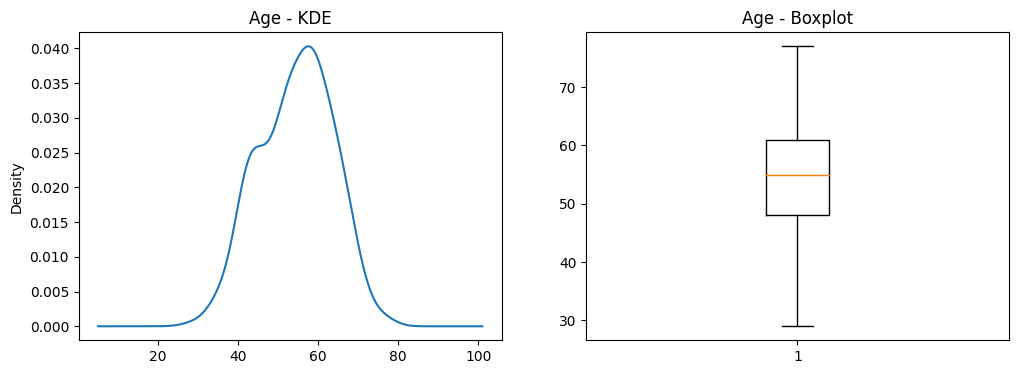

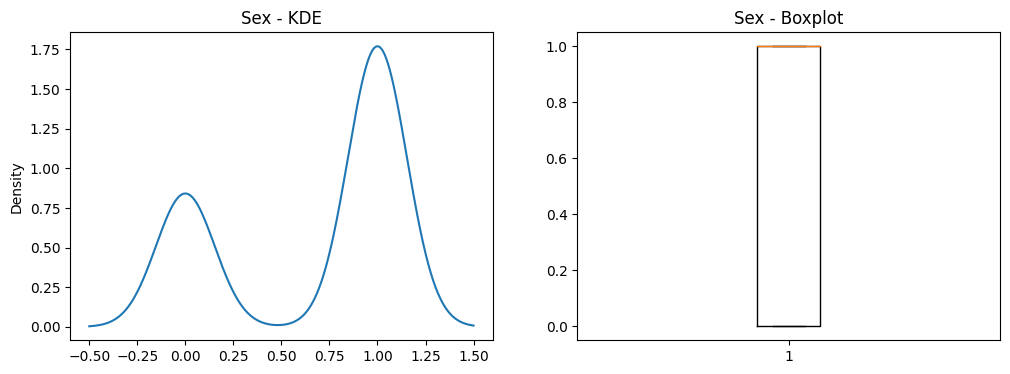

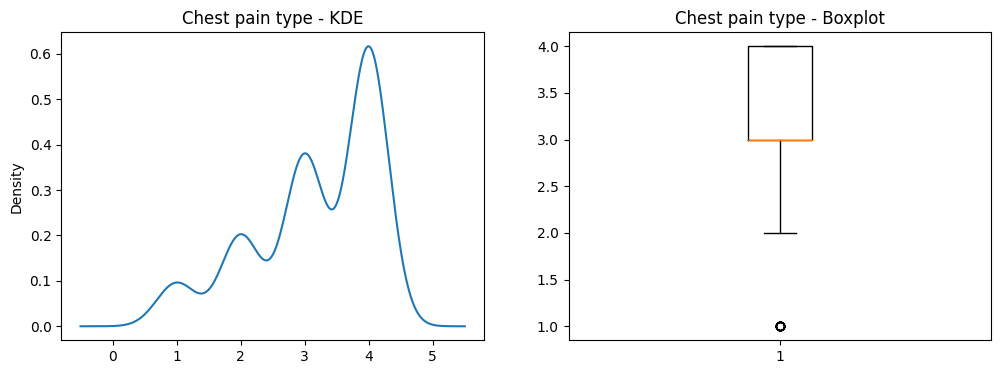

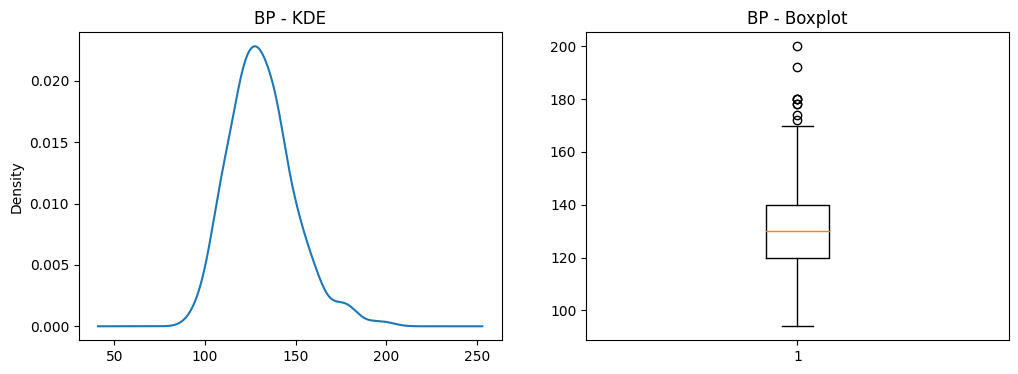

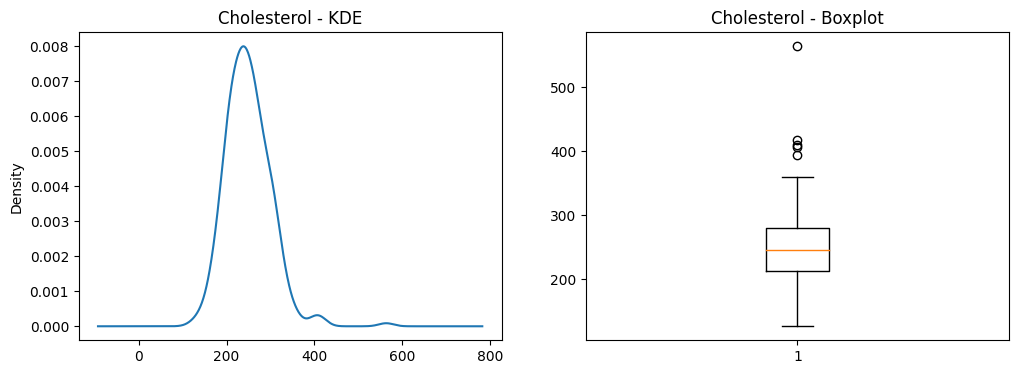

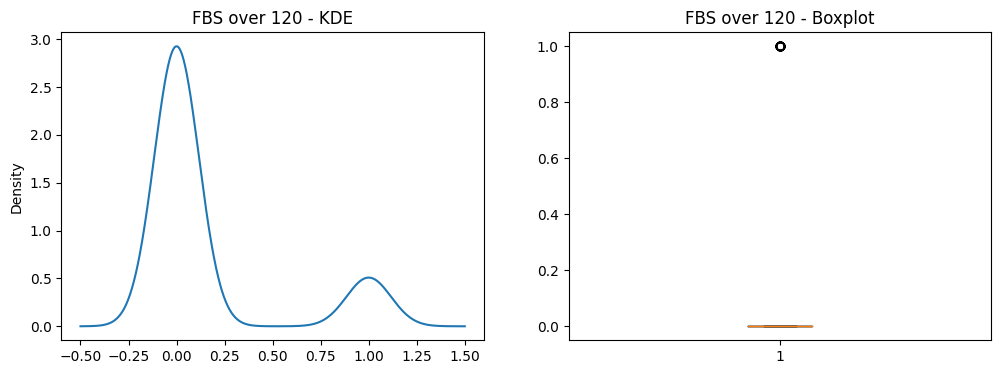

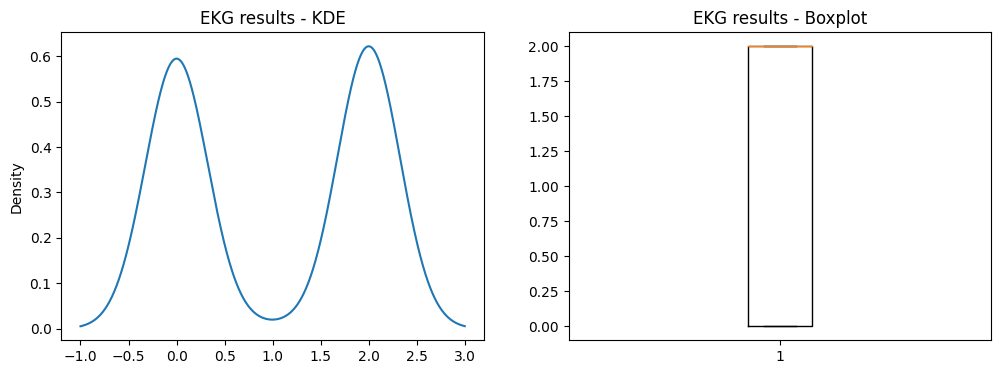

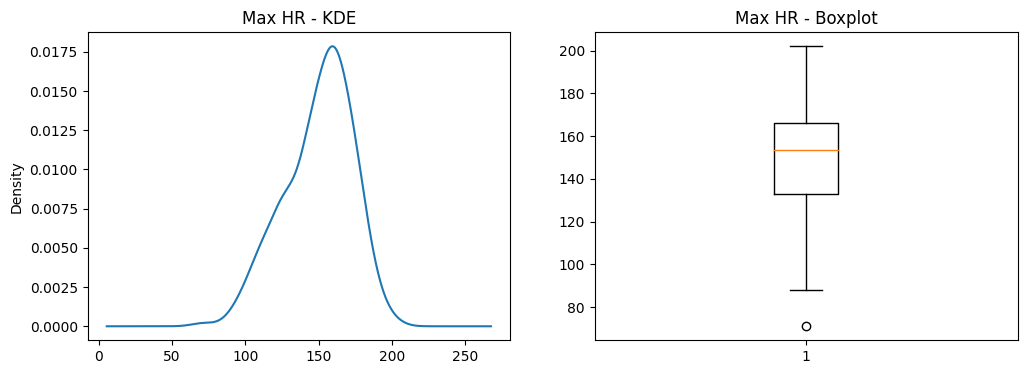

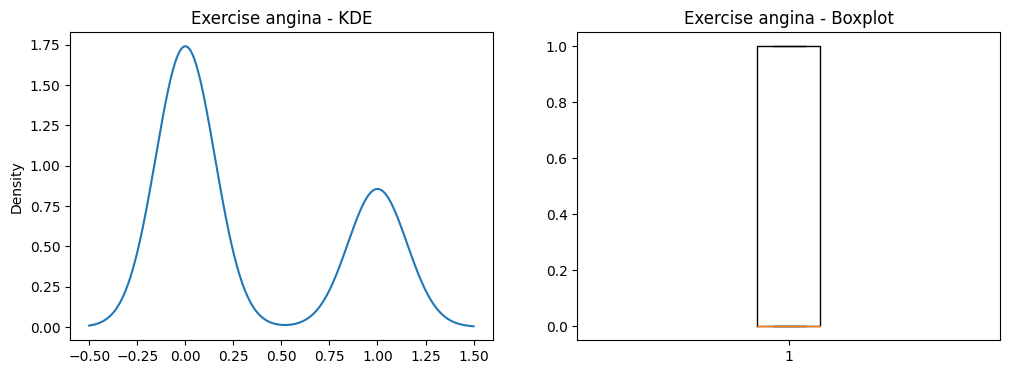

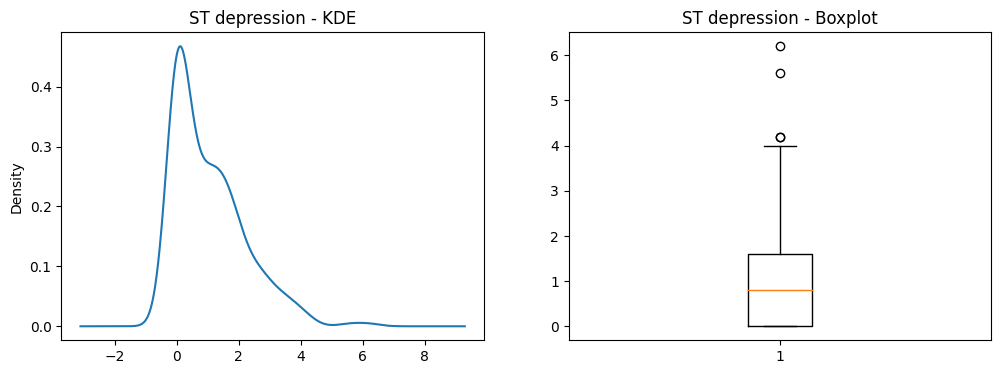

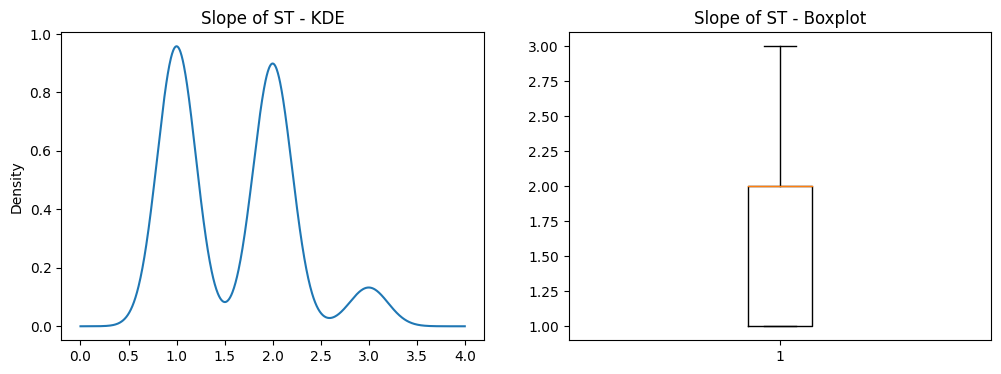

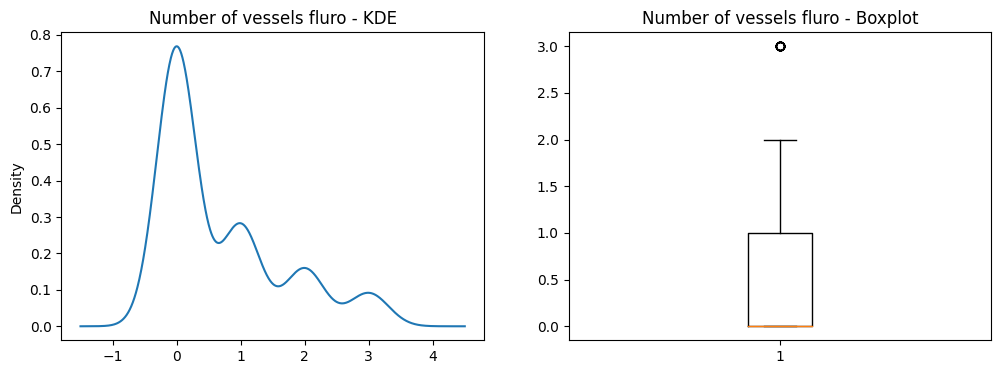

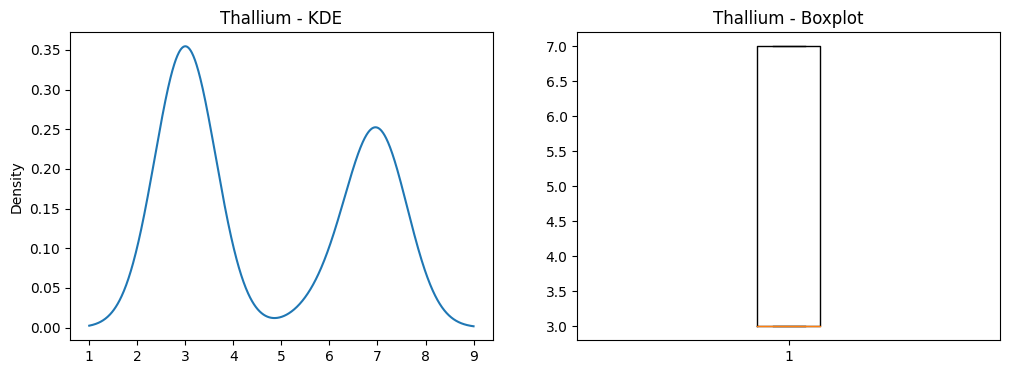

In [308]:
# Misalnya df adalah DataFrame Anda
columns_to_check = [col for col in df.columns if col != 'Heart Disease']

for column in columns_to_check:
    f = plt.figure(figsize=(12, 4))

    # Plot KDE
    f.add_subplot(1, 2, 1)
    df[column].plot(kind='kde')
    plt.title(f'{column} - KDE')

    # Plot Boxplot
    f.add_subplot(1, 2, 2)
    plt.boxplot(df[column])
    plt.title(f'{column} - Boxplot')

    plt.show()

# Korelasi kolom

<Axes: >

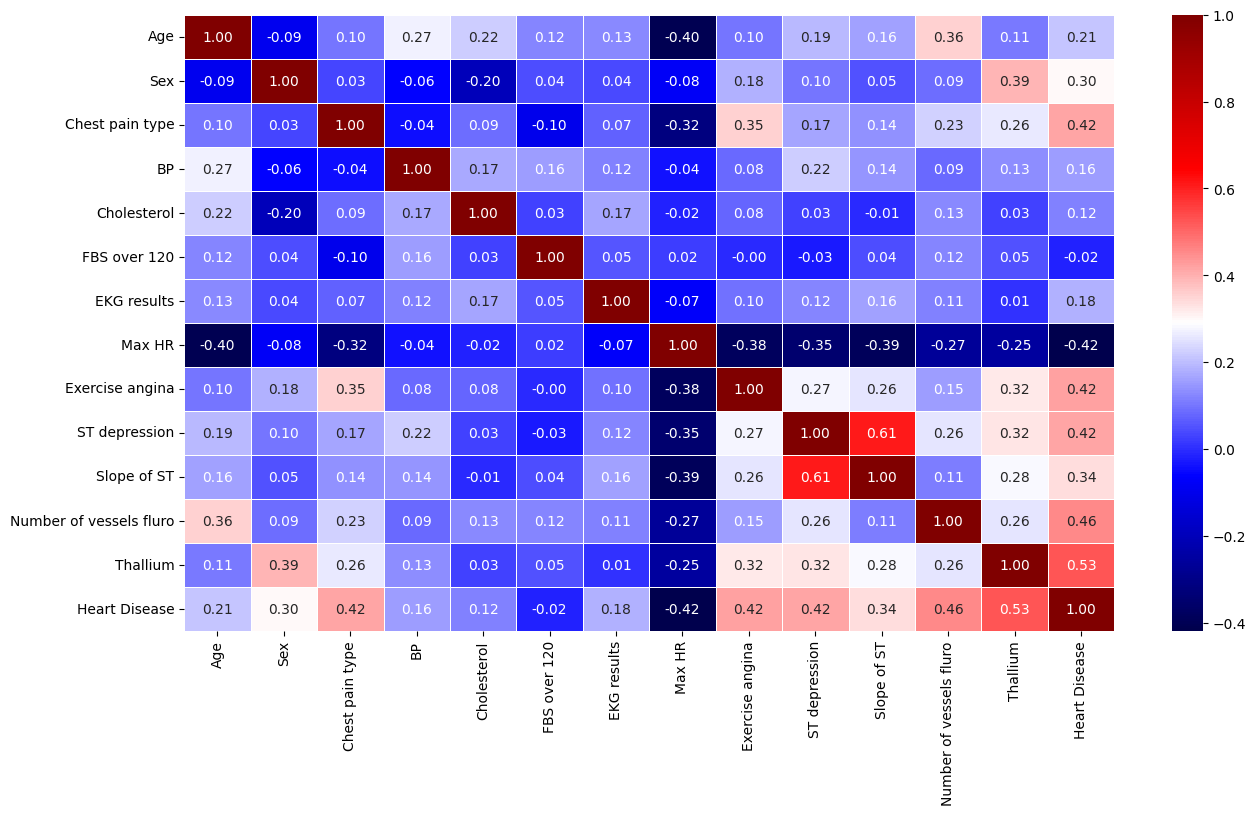

In [309]:
# Heatmap korelasi antar fitur
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.5, cmap="seismic", fmt='0.2f')

#Korelasi kolom dengan target Heart Disease

In [310]:
correlation_with_target = df.corr().loc[:, 'Heart Disease']

# Menampilkan korelasi dengan kolom target
print(correlation_with_target)

Age                        0.212322
Sex                        0.297721
Chest pain type            0.417436
BP                         0.155383
Cholesterol                0.118021
FBS over 120              -0.016319
EKG results                0.182091
Max HR                    -0.418514
Exercise angina            0.419303
ST depression              0.417967
Slope of ST                0.337616
Number of vessels fluro    0.455336
Thallium                   0.525020
Heart Disease              1.000000
Name: Heart Disease, dtype: float64


# Standarisasi / Normalisasi

In [311]:
# Misalnya df adalah DataFrame Anda
columns_to_normalize = [col for col in df.columns if col != 'Heart Disease']

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan normalisasi pada semua kolom kecuali 'Heart Disease'
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Menampilkan DataFrame setelah normalisasi
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706,1
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277,0
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277,1
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277,0
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706,0


# Balancing data

In [312]:
# Jumlah resiko serangan jantung (yes or no)
df['Heart Disease'].value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

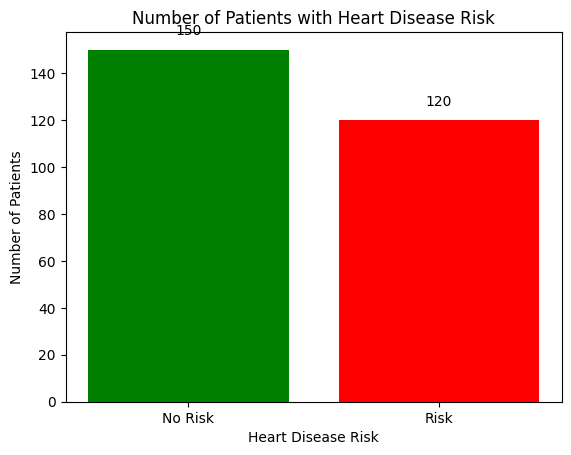

In [313]:
# Menampilkan data sebelum balancing data
heart_disease_counts = df['Heart Disease'].value_counts()

plt.bar(heart_disease_counts.index, heart_disease_counts.values, color=['green', 'red'])
plt.xticks(heart_disease_counts.index, labels=['No Risk', 'Risk'])
plt.xlabel('Heart Disease Risk')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with Heart Disease Risk')

# Menambahkan label jumlah diatas bar
for i, count in enumerate(heart_disease_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()

#Feature Selection

In [314]:
X = df[['Chest pain type', 'Exercise angina', 'ST depression', 'Number of vessels fluro', 'Thallium']]
Y = df['Heart Disease']

In [315]:
# install imbalanced
!pip install -U imbalanced-learn

In [316]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

In [317]:
# Proses balancing data
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

(X_resampled.shape, Y_resampled.shape)

((300, 5), (300,))

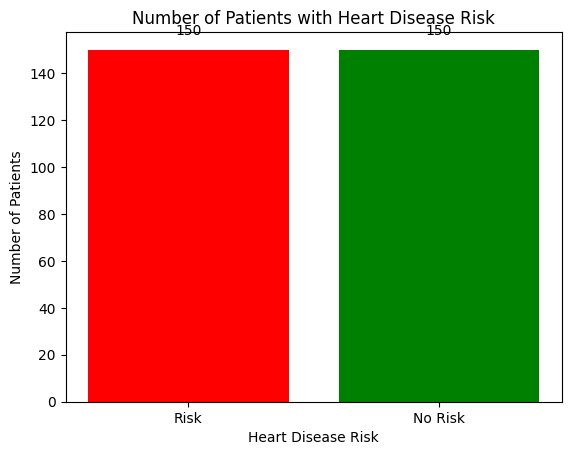

In [318]:
# Menampilkan data setelah Balancing
heart_disease_counts = Y_resampled.value_counts()

plt.bar(heart_disease_counts.index, heart_disease_counts.values, color=['green', 'red'])
plt.xticks(heart_disease_counts.index, labels=['No Risk', 'Risk'])
plt.xlabel('Heart Disease Risk')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with Heart Disease Risk')

# Menambahkan label jumlah diatas bar
for i, count in enumerate(heart_disease_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()

In [319]:
# Data setelah balancing
X_resampled

,Chest pain type,Exercise angina,ST depression,Number of vessels fluro,Thallium
0,0.870928,-0.701222,1.181012,2.472682,-0.875706
1,-0.183559,-0.701222,0.481153,-0.711535,1.189277
2,-1.238045,-0.701222,-0.656118,-0.711535,1.189277
3,0.870928,1.426081,-0.743600,0.349871,1.189277
4,-1.238045,1.426081,-0.743600,0.349871,-0.875706
...,...,...,...,...,...
295,0.870928,-0.701222,-0.265261,1.411276,0.799325
296,0.422607,-0.701222,-0.918565,-0.711535,-0.875706
297,0.870928,-0.701222,0.306188,0.349871,1.189277
298,-2.292532,-0.701222,-0.842928,-0.711535,0.016986


#Build model

In [320]:
X_train, X_val, Y_train, Y_val = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# membuat dictionary untuk menyimpan model
models = {}

# deklarasi model algoritma ke dalam dictionary models
models['Random Forest'] = RandomForestClassifier()
models['Logistic Regression'] = LogisticRegression()
models['Support Vector Machines'] =  LinearSVC()
models['Decision Trees'] =  DecisionTreeClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()
models['XGBoost'] = XGBClassifier()
models['K-Nearest Neighbors'] = KNeighborsClassifier()

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Build model klasifikasi
    models[key].fit(X_train, Y_train)

    # Test model agar menghasilkan hasil prediction
    predictions = models[key].predict(X_val)

    # menghitung matriks Accuracy, Precision and Recall
    accuracy[key] = accuracy_score(predictions, Y_val)
    precision[key] = precision_score(predictions, Y_val)
    recall[key] = recall_score(predictions, Y_val)
    print('Classification Report:',key)
    print(classification_report(Y_val,predictions))

    # menghitung nilai AUC-ROC
    Y_predict = models[key].predict(X_val)
    auc = roc_auc_score(Y_val, Y_predict)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_val, predictions)
    print('ROC_AUC_SCORE is',roc_auc_score(Y_val, predictions))

    # menampilkan kurva ROC
    #plt.plot(false_positive_rate, true_positive_rate)
    #plt.xlabel('FPR')
    #plt.ylabel('TPR')
    #plt.title('ROC curve')
    #plt.show()

Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.82      0.93      0.87        29

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

ROC_AUC_SCORE is 0.868743047830923
Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.87      0.93      0.90        29

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

ROC_AUC_SCORE is 0.9010011123470522
Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.87      0.93      

#Akurasi model

In [321]:
# Membuat dataframe yang berisi skor akurasi model
accuracy_df = pd.DataFrame.from_dict(accuracy, orient='index', columns=['Accuracy'])

# Mengurutkan berdasarkan skor akurasi tertinggi
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
accuracy_df = pd.DataFrame(accuracy_df)

# Cetak dataframe akurasi
accuracy_df

,Accuracy
Logistic Regression,0.900000
Support Vector Machines,0.900000
Gaussian Naive Bayes,0.900000
Random Forest,0.866667
K-Nearest Neighbors,0.866667
XGBoost,0.833333
Decision Trees,0.750000


#Cross Validation

In [322]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for key in models.keys():
    accuracy_vals = []
    precision_vals = []
    recall_vals = []
    f1_vals = []

    for train_index, val_index in kf.split(X_resampled, Y_resampled):
        X_train_fold, X_val_fold = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
        Y_train_fold, Y_val_fold = Y_resampled.iloc[train_index], Y_resampled.iloc[val_index]

        models[key].fit(X_train_fold, Y_train_fold)
        predictions_fold = models[key].predict(X_val_fold)

        accuracy_vals.append(accuracy_score(predictions_fold, Y_val_fold))
        precision_vals.append(precision_score(predictions_fold, Y_val_fold))
        recall_vals.append(recall_score(predictions_fold, Y_val_fold))
        f1_vals.append(f1_score(predictions_fold, Y_val_fold))

    accuracy[key] = sum(accuracy_vals) / len(accuracy_vals)
    precision[key] = sum(precision_vals) / len(precision_vals)
    recall[key] = sum(recall_vals) / len(recall_vals)
    f1_score_avg = sum(f1_vals) / len(f1_vals)

    print('Hasil Cross-Validation untuk', key)
    print('Average Accuracy:', accuracy[key])
    print('Average Precision:', precision[key])
    print('Average Recall:', recall[key])
    print('Average F1 Score:', f1_score_avg)
    print('')

Hasil Cross-Validation untuk Random Forest
Average Accuracy: 0.8300000000000001
Average Precision: 0.8066666666666666
Average Recall: 0.8475661375661376
Average F1 Score: 0.8262431941923774

Hasil Cross-Validation untuk Logistic Regression
Average Accuracy: 0.8466666666666667
Average Precision: 0.8266666666666665
Average Recall: 0.8600446704451153
Average F1 Score: 0.8425941063483554

Hasil Cross-Validation untuk Support Vector Machines
Average Accuracy: 0.8466666666666667
Average Precision: 0.8266666666666665
Average Recall: 0.8600446704451153
Average F1 Score: 0.8425941063483554

Hasil Cross-Validation untuk Decision Trees
Average Accuracy: 0.7733333333333333
Average Precision: 0.7466666666666667
Average Recall: 0.7893670804126867
Average F1 Score: 0.7669046671732938

Hasil Cross-Validation untuk Gaussian Naive Bayes
Average Accuracy: 0.8366666666666667
Average Precision: 0.8200000000000001
Average Recall: 0.8475925631654219
Average F1 Score: 0.8332736104856714

Hasil Cross-Validatio

#Prediksi data baru

In [323]:
# Memilih model Logistic Regression
logistic_regression_model = models['Logistic Regression']

# Data baru (ganti nilainya sesuai dengan data baru yang ingin Anda prediksi)
data_baru = pd.DataFrame({
    'Chest pain type': [2],
    'Exercise angina': [1],
    'ST depression': [3],
    'Number of vessels fluro': [5],
    'Thallium': [7]
})

# Melakukan prediksi menggunakan model Logistic Regression
prediction = logistic_regression_model.predict(data_baru)

# Menampilkan hasil prediksi
print('Prediksi data baru menggunakan Logistic Regression: ', prediction)

Prediksi data baru menggunakan Logistic Regression:  [1]
